In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/outlineddataset/outliners.csv


In [2]:
# THIS DATASET HAS TAKEN CARE OF OUTLIERS AND MISSING VALUES 
dataset=pd.read_csv('/kaggle/input/outlineddataset/outliners.csv')

In [3]:
dataset.shape

(42368, 1036)

In [4]:
# MIN MAX SCALING 
from sklearn.preprocessing import MinMaxScaler
def minmax_scaling(cur_col):
    min_val = np.min(cur_col)
    max_val = np.max(cur_col)
    scaled_col = (cur_col - min_val) / (max_val - min_val)
    return scaled_col
for index in range(2, dataset.shape[1]):
    cur_col = dataset.iloc[:, index]
    scaled_col = minmax_scaling(cur_col)
    dataset.iloc[:, index] = scaled_col

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# EXTRACTING 9999 VALUES FROM THE DATASET AS THE DATASET IS IMBALANCED AND LARGE
start_row = 2712
end_row = 12710
new_dataset = dataset.iloc[start_row-1:end_row]
#new_dataset.to_csv('new_dataset.csv', index=False)
new_dataset_flag=new_dataset.iloc[0:4998]
for i in range(0, new_dataset_flag.shape[0]):
    new_dataset_flag.iloc[i, 1] = 1    
new_dataset_flag    


,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
2711,7CF96D776BA059AF39F93EAA1C33BAF1,1,0.038803,0.191624,0.050630,0.043029,0.011314,0.218259,0.114976,0.111472,...,0.034658,0.024692,0.008714,0.025893,0.012531,0.014976,0.009652,0.007775,0.013152,0.023869
2712,0D0D35545733CFF9A5F6DECC7D256FD6,1,0.077605,0.383247,0.101261,0.086058,0.022629,0.436518,0.229952,0.222945,...,0.051135,0.035198,0.073894,0.327934,0.072878,0.234045,0.259016,0.240507,0.301217,0.194115
2713,728EBE280DB5DD2CC1C6413D4979903F,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.067611,0.045705,0.042923,0.047147,0.053080,0.040270,0.042285,0.040268,0.046995,0.022595
2714,A43D914BA2927704D7C6BD0CC5AC2A0F,1,1.000000,1.000000,1.000000,1.000000,0.661716,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2715,7C1729156A52315E48D360FD664B700B,1,0.539026,0.146345,0.133161,0.120922,0.018802,0.349481,0.135119,0.140125,...,0.168534,0.128611,0.120502,0.139196,0.097438,0.044319,0.046517,0.064310,0.061374,0.050038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,1CE42DCD5B59DE4FF826612A17BA85A5,1,0.018950,0.015439,0.020782,0.038789,0.000847,0.021500,0.029211,0.015616,...,0.046331,0.035157,0.012897,0.031282,0.009022,0.011667,0.007722,0.010394,0.010390,0.005669
7705,A36AC19E74E851D7363DD7D37202BB7A,1,0.061212,0.063312,0.078494,0.088414,0.006147,0.087333,0.088187,0.072084,...,0.000000,0.000082,0.000000,0.000000,0.000050,0.000044,0.000000,0.000042,0.000000,0.000000
7706,B7A54A2564FCD6844C50AC4BB8D61523,1,0.021357,0.018553,0.018929,0.022457,0.001561,0.021203,0.019797,0.019799,...,0.012301,0.011201,0.006822,0.010327,0.006817,0.006008,0.005197,0.005831,0.006006,0.005587
7707,CC94812B7F17D88B2D7A27682B2433F6,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000718,0.000000,0.005079,0.002320,0.007819,0.002830,0.002116,0.001183,0.007058,0.001931


In [6]:
# CREATING CYNTHETIC THEFT ATTACKS AS THE VALUES OF THEFT USERS GIVEN IN THE DATASET IS TOO LESS 

import random
# Applying attacks to benign ranges
dataset_t1=new_dataset.iloc[901:1584]
dataset_t2=new_dataset.iloc[1584:2267]
dataset_t3=new_dataset.iloc[2267:2950]
dataset_t4=new_dataset.iloc[2950:3633]
dataset_t5=new_dataset.iloc[3633:4316]
dataset_t6=new_dataset.iloc[4316:4999]

#TA1
for i in range(0, dataset_t1.shape[0]):
    n = random.uniform(0.1, 0.9)
    for j in range(2, 1036):
        dataset_t1.iloc[i, j] = n*dataset_t1.iloc[i,j]


In [7]:
#TA2        
for i in range(0, dataset_t2.shape[0]):
    for j in range(2, 1036):
        n = random.uniform(0.1,1)
        dataset_t2.iloc[i, j] = n*dataset_t2.iloc[i,j]


In [8]:
#TA3       
for i in range(0, dataset_t3.shape[0]):
    n = random.randint(0,1)
    for j in range(2, 1036):
        dataset_t3.iloc[i, j] = n*dataset_t3.iloc[i,j]


In [9]:
        
#TA4        
for i in range(0, dataset_t4.shape[0]):
    n = random.uniform(0.1,1)
    row_data=dataset_t4.iloc[i]
    mean_value = row_data[2:].mean()
    for j in range(2, 1036):
        dataset_t4.iloc[i, j] = n*mean_value



In [10]:
        
#TA5          
for i in range(0, dataset_t5.shape[0]):
    row_data=dataset_t5.iloc[i]
    mean_value = row_data[2:].mean()
    for j in range(2, 1036):
        dataset_t5.iloc[i, j] = mean_value        


In [11]:
        
 #TA6         
for i in range(0, dataset_t6.shape[0]):
    start_index = 2  
    dataset_t6.iloc[:, start_index:] = dataset_t6.iloc[:, start_index:].apply(lambda row: row[::-1], axis=1)
               

/tmp/ipykernel_29/80179676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_t6.iloc[:, start_index:] = dataset_t6.iloc[:, start_index:].apply(lambda row: row[::-1], axis=1)


In [12]:
# SEPARATING DEPENDENT AND INDEPENDENT VARIABLES
x = new_dataset.iloc[:, 2:].values
y = new_dataset.iloc[:, 1].values
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (9999, 1034)
Shape of y: (9999,)


In [13]:
# TLGRU MODEL IN WHICH LSTM IS USED AS A FEATURE EXTRACTOR AND GRU FOR HANDLING VANISHING GRADIENTS PROBLEM

import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, LeakyReLU, BatchNormalization, Dropout, Flatten, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

# LSTM feature extractor
def create_lstm_feature_extractor(inputs):
    x = LSTM(units=200, return_sequences=True)(inputs)
    x = LeakyReLU(alpha=0.001)(x)
    x = LSTM(units=200, return_sequences=True)(inputs)
    x = LeakyReLU(alpha=0.001)(x)
    x = LSTM(units=100, return_sequences=True)(x)
    x = LeakyReLU(alpha=0.001)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    return x

# Model
def create_tlgru_model(timesteps, features):
    # Define input layer
    inputs = Input(shape=(timesteps, features))
    
    # LSTM feature extractor
    x = create_lstm_feature_extractor(inputs)
    
    # LSTM feature extractor to each time step independently
    x = TimeDistributed(Dense(units=1))(x)
    
    # GRU layer
    x = GRU(units=50, return_sequences=True)(x)
    x = GRU(units=50, return_sequences=True)(x)
    
    # Flatten layer
    x = Flatten()(x)
    
    # Dropout layer
    x = Dropout(0.2)(x)
    
    # Fully connected layer (Dense layer)
    outputs = Dense(units=1)(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

timesteps = 50
features = 1034

rnn = create_tlgru_model(timesteps, features)
rnn.summary()


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1034)]        0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 200)           988000    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 100)           120400    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 50, 100)           0         
                                                                 
 batch_normalization (BatchN  (None, 50, 100)          400       
 ormalization)                                                   
                                                             

In [14]:
import numpy as np 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.optimizers import Adam

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Reshape x_test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Reshape y_train
y_train = np.reshape(y_train, (y_train.shape[0], 1))

# Reshape y_test
y_test = np.reshape(y_test, (y_test.shape[0], 1))

# TLGRU model
rnn = create_tlgru_model(x_train.shape[1], 1)

# Compile
optimizer = Adam(learning_rate=0.001) 
rnn.compile(optimizer=optimizer, loss='mse')

batch_size = 32 
epochs = 100

history=rnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

loss = rnn.evaluate(x_test, y_test) 
print("Test Loss:", loss)

y_pred = rnn.predict(x_test)
y_pred_classes = np.round(y_pred).astype(int)


Epoch 1/100
250/250 [==============================] - 53s 157ms/step - loss: 0.2433 - val_loss: 0.2623
Epoch 2/100
250/250 [==============================] - 37s 149ms/step - loss: 0.2143 - val_loss: 0.2727
Epoch 3/100
250/250 [==============================] - 37s 147ms/step - loss: 0.2059 - val_loss: 0.2056
Epoch 4/100
250/250 [==============================] - 37s 148ms/step - loss: 0.2016 - val_loss: 0.2238
Epoch 5/100
250/250 [==============================] - 37s 147ms/step - loss: 0.2026 - val_loss: 0.2135
Epoch 6/100
250/250 [==============================] - 37s 146ms/step - loss: 0.1957 - val_loss: 0.1970
Epoch 7/100
250/250 [==============================] - 37s 147ms/step - loss: 0.1934 - val_loss: 0.1930
Epoch 8/100
250/250 [==============================] - 37s 147ms/step - loss: 0.1903 - val_loss: 0.2109
Epoch 9/100
250/250 [==============================] - 37s 148ms/step - loss: 0.1935 - val_loss: 0.2008
Epoch 10/100
250/250 [==============================] - 36s 146m

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

loss = rnn.evaluate(x_test, y_test)
print("Test Loss:", loss)

y_pred = rnn.predict(x_test)
y_pred_classes = np.round(y_pred).astype(int)
y_pred_binary = np.where(y_pred_classes > 0.5, 1, 0)  

y_test_binary = np.where(y_test > 0.5, 1, 0) 

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

# confusion matrix
confusion_mat = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(confusion_mat)


63/63 [==============================] - 4s 59ms/step - loss: 0.2158
Test Loss: 0.21577800810337067
63/63 [==============================] - 4s 69ms/step
Accuracy: 0.7325
Confusion Matrix:
[[670 316]
 [219 795]]


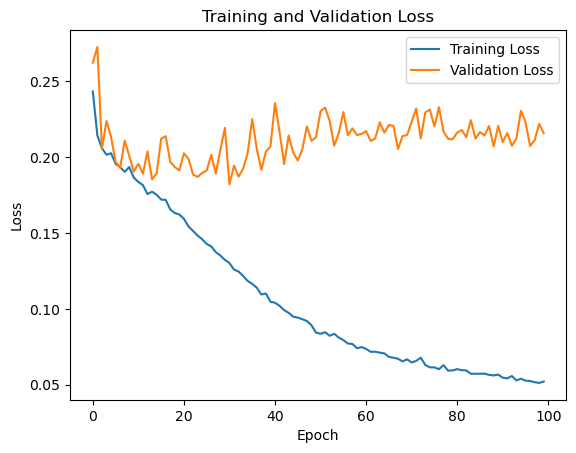

In [16]:
import matplotlib.pyplot as plt

# Ploting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


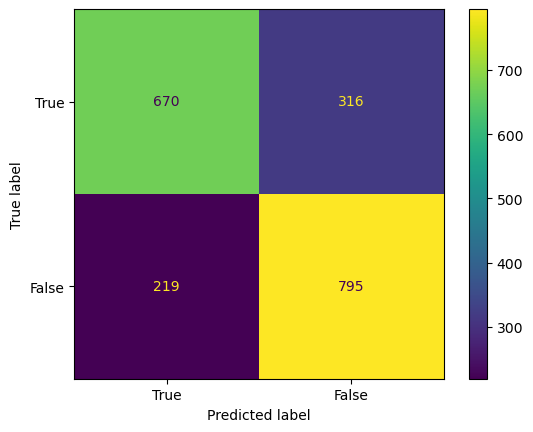

In [17]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_binary, y_pred_binary)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix
y_pred = rnn.predict(x_test)
y_pred_classes = np.round(y_pred).astype(int)
y_pred_binary = np.where(y_pred_classes > 0.5, 1, 0)  
y_test_binary = np.where(y_test > 0.5, 1, 0)  

# accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

# precision
precision = precision_score(y_test_binary, y_pred_binary)
print("Precision:", precision)

# F1 score
f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score:", f1)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_binary, y_pred_binary)
print("MCC Score:", mcc)

# confusion matrix
confusion_mat = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(confusion_mat)


63/63 [==============================] - 4s 59ms/step
Accuracy: 0.7325
Precision: 0.7155715571557155
F1 Score: 0.748235294117647
MCC Score: 0.46637342264482484
Confusion Matrix:
[[670 316]
 [219 795]]
